# Telco Customer Churn
## Created by: Mohammad Lutfi Mahatir

### **BUSINESS PROBLEM UNDERSTANDING**

**Context**

Industri telekomunikasi adalah industri yang terkenal sangat kompetitif dan setiap perusahaan akan terus berupaya untuk mencari cara mempertahankan pelanggan mereka dan menarik pelanggan baru. Dengan begitu banyaknya penyedia layanan telekomunikasi dan internet, seorang customer tentunya dapat dengan mudah untuk memilih penyedia layanan terbaik yang mereka inginkan hanya dengan berdasarkan beberapa faktor, seperti harga dan efektifitas layanan. 

Ketika harga sebuah produk layanan internet dinilai murah dan memiliki koneksi yang stabil, tentunya seorang pelanggan akan dengan mudah juga tertarik dan mau menjadi customer dari sekian banyak penyedia layanan telekomunikasi tersebut. Namun, hal tersebut juga menjadi bahaya ketika sebuah perusahaan penyedia layanan internet memutuskan untuk menaikan harga produk layanan atau kestabilan konektivitas internet yang mereka miliki sedang mengalami gangguan, customer yang menjadi pelanggan dari perusahaan tersebut juga akan sangat mudah untuk melirik dan tertarik pada kompetitor.

**Problem Statement :**

Berdasarkan context tersebut, sebuah perusahaan penyedia layanan internet menghadapi tantangan dimana seorang customer bisa dengan mudahnya tidak lagi menjadi pelanggan mereka. Hal tersebut dikenal dengan "Churn".

Churn mengacu pada situasi di mana pelanggan membatalkan layanan mereka, pindah ke kompetitor, dan tidak lagi menjadi customer perusahaan penyedia layanan internet. Hal ini dapat mengakibatkan kerugian yang signifikan bagi perusahaan telekomunikasi karena memperoleh pelanggan baru seringkali lebih mahal daripada mempertahankan pelanggan yang sudah ada.

**Goals :**

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan yang dapat memprediksi kemungkinan seorang customer akan memilih untuk Churn atau tetap menjadi customer mereka.

Target:

0 : Tidak Churn

1 : Churn

**Analytic Approach :**

Sebagai Data Scientist, akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang customer dinilai akan Churn atau tidak.

**Metric Evaluation**

Type 1 error : False Positive (Customer diprediksi churn, namun tidak churn)
Konsekuensi: mengeluarkan biaya dan usaha yang tidak perlu untuk mempertahankan pelanggan yang sebenarnya tidak akan churn

Type 2 error : False Negative (Customer diprediksi tidak churn, namun ternyata churn)
Konsekuensi: membuat perusahaan kehilangan pelanggan yang sebenarnya akan churn karena tidak ada upaya yang dilakukan untuk mempertahankannya.

Berdasarkan konsekuensi di atas, sebisa mungkin saya akan membuat model yang dapat benar memprediksi perusahaan akan kehilangan customer. Jadi saya ingin sebanyak mungkin prediksi kelas negatif yang benar. Jadi nanti metric utama yang akan kita gunakan adalah Recall. Semakin tinggi nilai Recall, semakin baik performa dari model dalam mengidentifikasi posisi Churn.

### **Data Understanding**

Note: 

- Data churn telekomunikasi mencakup informasi tentang perusahaan telekomunikasi fiktif yang menyediakan layanan telepon rumah dan Internet kepada 4930 pelanggan California pada Q3 tahun 2019.
- Data Imbalance

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Dependents | Text | Whether the customer has dependents or not. |
| Tenure | Int | Number of months the customer has stayed with the company. |
| OnlineSecurity | Text | Whether the customer has online security or not. |
| OnlineBackup | Text | Whether the customer has online backup or not. |
| InternetService | Text | Whether the client is subscribed to Internet service. |
| DeviceProtection | Text | Whether the client has device protection or not. |
| TechSupport | Text | Whether the client has tech support or not  |
| Contract | Text | Type of contract according to duration. |
| PaperlessBilling | Text | Bills issued in paperless form. |
| MonthlyCharges | Float | Amount of charge for service on monthly bases. |
| Churn | Text | Whether the customer churns or not. |

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
df = pd.read_csv('telco_customer_churn.csv')
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


#### **Exploratory Data Analysis**

**Proporsi customer yang memiliki dependents atau tidak**

Text(0.5, 1.0, 'percentage of Dependents')

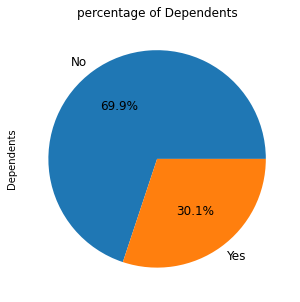

In [3]:
# Menampilkan pie chart yang memuat proporsi dan presentase customer yang memiliki dependents atau tidak
ax = (df['Dependents'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_title('percentage of Dependents', fontsize = 12)

Berdasarkan demografisnya, customer yang tidak memiliki dependants lebih banyak sebesar 69.9% dibandingkan dengan customer yang memiliki dependants sebesar 30.1%.

**Proporsi customer dengan tipe dan spesifikasi layanan yang berbeda-beda**

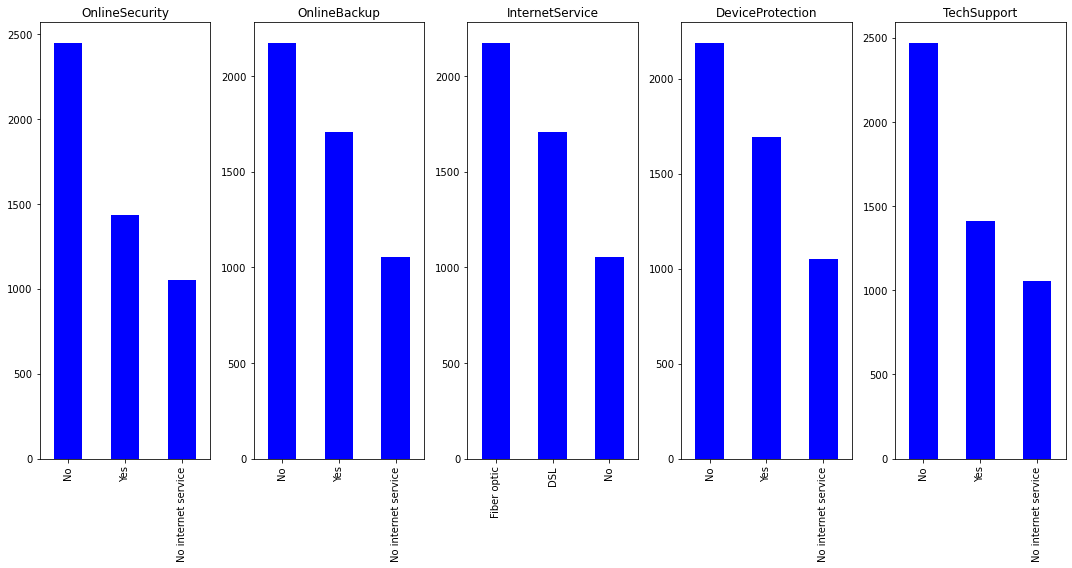

In [4]:
# Menampilkan barplot yang menunjukan jumlah customer dengan spesifikasi tipe layanan yang berbeda-beda
cat_cols = df.copy
cat_cols = df[['OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport']]

nrows=1
ncols=5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))
ax = axes.flatten()

for i, column in enumerate(cat_cols.columns):
    df[column].value_counts().plot(kind='bar', ax=ax[i], color='b', title=column)
    if i >= (nrows * ncols) - 1:
        break

plt.tight_layout()
plt.show()

Berdasarkan barplot di atas, jumlah customer dengan spesifikasi tipe layanan yang berbeda-beda terbilang cukup merata dan tidak begitu signifikan jumlah perbedaannya.

**Jumlah customer berdasarkan tenure**

Text(0.5, 1.0, 'Number of Customers by their tenure')

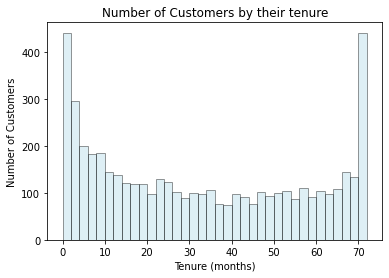

In [5]:
# Distplot untuk menunjukan jumlah customer berdasarkan tenure
ax = sns.distplot(df['tenure'], hist=True, kde=False, bins=int(180/5), color = 'lightblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by their tenure')

Setelah melihat histogram di atas, ditemukan bahwa banyak pelanggan yang telah bergabung dengan perusahaan telekomunikasi tersebut hanya dalam waktu satu bulan, sementara cukup banyak yang bertahan selama kurang lebih 72 bulan. Hal ini bisa terjadi karena pelanggan yang berbeda memiliki kontrak yang berbeda juga. Dengan demikian berdasarkan kontrak yang mereka buat, pelanggan lebih mudah untuk tetap menjadi customer atau memilih pergi dari perusahaan.

**Customer churn berdasarkan contract type dan tenure**

Text(0.5, 1.0, 'Two Year Contract')

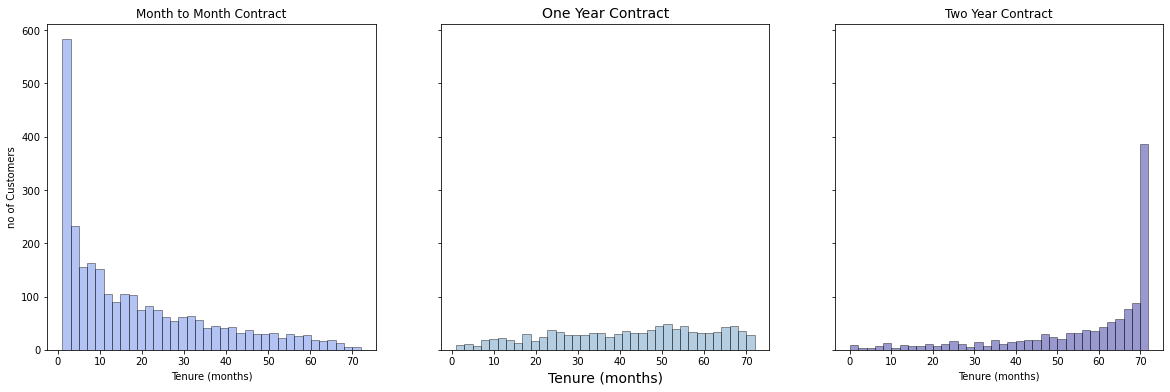

In [6]:
# Distplot untuk menunjukan jumlah customer yang churn berdasarkan contract type dan tenure
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'royalblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('no of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Dari sini, terlihat dengan jelas bahwa customer dengan tipe contract month-to-month memiliki tenure yang lebih rendah dan customer dengan tipe contract two-year memiliki tenure yang tinggi sekitar 70 bulan. Jadi probabilitas tertinggi untuk pelanggan churn adalah dalam jenis contract month-to-month.

### **Data Preprocessing**

Pada tahap ini, akan dilakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan digunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

In [7]:
# Membuat duplikasi dataframe
dfa = df.copy()

In [8]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in dfa.columns:
    listItem.append([col, dfa[col].dtype, dfa[col].isna().sum(), round((dfa[col].isna().sum()/len(dfa[col]))*100, 2),
                    dfa[col].nunique(), list(dfa[col].drop_duplicates().sample(2).values)]);

dfa_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfa_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,0.0,73,"[39, 29]"
2,OnlineSecurity,object,0,0.0,3,"[Yes, No]"
3,OnlineBackup,object,0,0.0,3,"[No internet service, No]"
4,InternetService,object,0,0.0,3,"[DSL, No]"
5,DeviceProtection,object,0,0.0,3,"[Yes, No]"
6,TechSupport,object,0,0.0,3,"[No internet service, Yes]"
7,Contract,object,0,0.0,3,"[Two year, Month-to-month]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[54.5, 93.85]"


Berdasarkan deskripsi data di atas, tidak ditemukan adanya missing values.

Namun, dikarenakan tidak adanya kolom 'ID' setiap customer yang dapat mengindikasikan bahwa setiap data adalah unique. Perlu dilakukan analisa lebih lanjut mengenai data duplikat pada dataset.

In [9]:
# Cek data duplikat
dfa.duplicated().sum()

77

Ternyata, ditemukan data duplikat sebanyak 77 data. Oleh karena itu, untuk menghindari bias pada training data, maka data yang terdeteksi duplikat akan di drop menggunakan fungsi .drop_duplicates().

In [10]:
# Drop data duplikat
dfa = dfa.drop_duplicates()

In [11]:
# Memeriksa jumlah data setelah drop duplikat
dfa

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


Setelah dilakukan drop duplikat, dapat terlihat data yang tadinya memiliki 4930 rows sudah berkurang menjadi 4853 rows.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

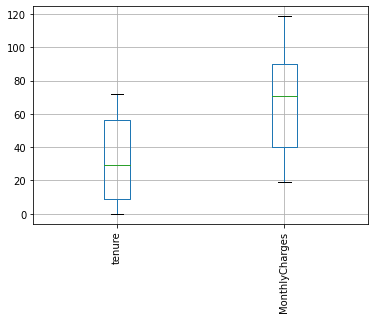

In [12]:
# Plot boxplot untuk mengecek outliers
dfa.boxplot(rot=90);

Sejauh ini, terlihat data kita cukup bersih karena tidak memiliki outliers dan missing values walaupun memiliki sedikit data duplikat. 

**Clean Dataset**

In [13]:
# Cek dataset yang sudah bersih
dfa.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [14]:
# Cek kembali info dataset
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4853 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4853 non-null   object 
 1   tenure            4853 non-null   int64  
 2   OnlineSecurity    4853 non-null   object 
 3   OnlineBackup      4853 non-null   object 
 4   InternetService   4853 non-null   object 
 5   DeviceProtection  4853 non-null   object 
 6   TechSupport       4853 non-null   object 
 7   Contract          4853 non-null   object 
 8   PaperlessBilling  4853 non-null   object 
 9   MonthlyCharges    4853 non-null   float64
 10  Churn             4853 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 455.0+ KB


### **Modeling**

In [15]:
# Import library untuk modeling

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, KFold, train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

**Encoding**

Sekarang mari kita melakukan encoding untuk fitur-fitur categorical yang kita miliki.
Yang akan kita lakukan adalah :

1. Merubah fitur/kolom `Dependents` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
2. Merubah fitur/kolom `OnlineSecurity` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
3. Merubah fitur/kolom `OnlineBackup` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
4. Merubah fitur/kolom `InternetService` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
5. Merubah fitur/kolom `DeviceProtection` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
6. Merubah fitur/kolom `TechSupport` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
7. Merubah fitur/kolom `Contract` menjadi 0-2 menggunakan Ordinal Encoding, karena fitur ini adalah tipe kontrak yang berbeda, dimana Month-to-month akan kita rubah menjadi 0 saja, dan One year akan kita rubah menjadi 1, dan Two year menjadi 2.
8. Merubah fitur/kolom `PaperlessBilling` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.

**Scaling**

Khusus untuk fitur 'tenure', ini mewakili jumlah bulan pelanggan menggunakan layanan, dan fitur 'monthly charges' mewakili biaya bulanan yang dibayar pelanggan. Kedua fitur memiliki skala yang berbeda dan memerlukan scaling untuk memastikan bahwa semua fitur memiliki bobot yang sama dalam algoritma machine learning.

Nilai scaling yang umum digunakan adalah normalisasi dan standarisasi. Dalam normalisasi, nilai fitur dibagi dengan nilai maksimum fitur untuk mengubah nilai ke dalam rentang 0 hingga 1. Dalam standarisasi, nilai fitur dikurangi dengan rata-rata fitur dan dibagi dengan standar deviasi untuk mengubah nilai fitur menjadi nilai z-score.

Pada kali ini, kita akan mencoba untuk menggunakan minmax scaller dan standard scaller untuk kemudian membandingkan mana yang lebih baik

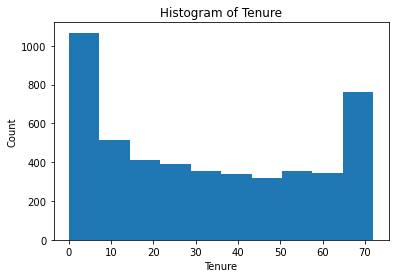

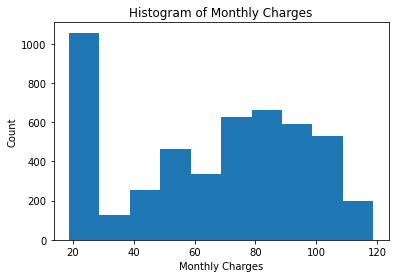

In [16]:
# Plot histogram for 'tenure'
plt.hist(dfa['tenure'], bins=10)
plt.title('Histogram of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

# Plot histogram for 'monthly charges'
plt.hist(dfa['MonthlyCharges'], bins=10)
plt.title('Histogram of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

Terlihat bahwa distribusi data 'tenure' dan 'MonthlyCharges' tidak normal, maka salah satu metode scaling yang dapat digunakan adalah normalisasi dengan MinMaxScaler(). MinMaxScaler() membantu mengatasi skewness (ketidakseimbangan) dan kurtosis (kelekatan) dalam data dengan mengkonversi semua nilai ke dalam rentang yang diberikan, biasanya antara 0 dan 1. Ini memastikan bahwa setiap fitur memiliki skala yang sama dan membantu mengatasi masalah dimana beberapa fitur memiliki skala yang jauh lebih besar daripada yang lain.

In [17]:
# Membuat mapping untuk ordinal encoder
ordinal_mapping = [
    {'col': 'Contract',
    'mapping':{
        'Month-to-month'      :    1,
        'One year'       :    2, 
        'Two year'       :    3, 
    }}
]

In [18]:
# Mengubah fitur kategorikal menjadi numerikal
preprocessor = ColumnTransformer(
transformers=[
    ('scl', MinMaxScaler(), ['tenure', 'MonthlyCharges']),
    ('OHE', OneHotEncoder(), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']),
    ('OE', ce.OrdinalEncoder(mapping= ordinal_mapping), ['Contract'])
    ], remainder='passthrough')

In [19]:
# Mengonversi kolom target column ke binary
dfa['Churn'] = np.where(dfa['Churn'] == 'Yes', 1, 0)

**Data splitting**

In [20]:
# Mendefinisikan X dan y
X = dfa.drop(['Churn'], axis=1)
y = dfa['Churn']

**Training and test splitting**

In [21]:
# Split data menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2023)

**Choose a Benchmark Model**

In [22]:
# Define algoritma yang digunakan
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
xgb = XGBClassifier(random_state=1)

# Kandidat algoritma
models = [lr, knn, dt, rf, xgb]

score_recall = []
nilai_mean_recall = []
nilai_std_recall = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    skfold = StratifiedKFold()

    estimator = Pipeline([
    ('preprocessor', preprocessor),
    ('sampler', SMOTE(sampling_strategy='minority')),
    ('model', i)
    ])

    # Recall
    model_cv_recall = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=skfold, 
        scoring='recall'
        )

    print(model_cv_recall, i)

    score_recall.append(model_cv_recall)
    nilai_mean_recall.append(model_cv_recall.mean())
    nilai_std_recall.append(model_cv_recall.std())

[0.80582524 0.74271845 0.7961165  0.82524272 0.79126214] LogisticRegression()
[0.66504854 0.69902913 0.73300971 0.6407767  0.69902913] KNeighborsClassifier()
[0.55825243 0.51456311 0.5631068  0.58252427 0.53883495] DecisionTreeClassifier(random_state=1)
[0.57281553 0.58252427 0.60679612 0.5776699  0.57281553] RandomForestClassifier(random_state=1)
[0.66990291 0.57281553 0.64563107 0.65048544 0.65048544] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, miss

In [23]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN Classifier', 'DecisionTree Classifier', 'RandomForest Classifier', 'XGBoost Classifier'],
    'Mean_Recall': nilai_mean_recall,
    'Std_Recall': nilai_std_recall})

,Model,Mean_Recall,Std_Recall
0,Logistic Regression,0.792233,0.027357
1,KNN Classifier,0.687379,0.031699
2,DecisionTree Classifier,0.551456,0.023098
3,RandomForest Classifier,0.582524,0.012659
4,XGBoost Classifier,0.637864,0.033576


**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model Logistic Regression dan XGBoost

In [36]:
# Benchmark 2 model terbaik
models = {
    'LOGREG': LogisticRegression(),
    'KNN': KNeighborsClassifier()
}

Recall_score = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
    ('Preprocessor', preprocessor),
    ('Sampler', SMOTE(sampling_strategy='minority')),
    ('model', models[i])
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Recall_score.append((recall_score(y_test, y_pred)))

score_before_tuning = pd.DataFrame({'Recall Score': Recall_score}, index=models.keys())
score_before_tuning

,Recall Score
LOGREG,0.833333
KNN,0.705426


- Ketika dilakukan prediksi pada test set, performa Logistic Regression dan KNN secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari Recall scorenya.

**Hyperparameter Tuning**

Karena model Logistic Regression memiliki performa yang sedikit lebih baik dari KNN, maka selanjutnya kita akan menggunakan model Logistic Regression ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model Logistic Regression dengan harapan dapat meningkatkan performa model.

**Logistic Regression Explanation**

Logistic Regression adalah metode pemodelan statistik yang digunakan untuk memprediksi nilai dari variabel target yang bersifat diskrit. Dalam hal ini, variabel target hanya memiliki beberapa nilai terbatas yang mewakili kategori (misalnya "ya" atau "tidak").

Logistic Regression berbeda dengan regresi linier biasa karena tidak mengasumsikan bahwa hubungan antara variabel target dan variabel independen adalah linier. Sebaliknya, logistic regression mengukur hubungan antara variabel independen dan probabilitas dari suatu kejadian yang berkaitan dengan variabel target.

Fungsi logistik digunakan untuk mengubah hasil dari model logistic regression menjadi probabilitas. Fungsi ini memastikan bahwa nilai probabilitas selalu berada dalam rentang antara 0 dan 1. Kemudian, nilai probabilitas ini dapat digunakan untuk memprediksi kelas suatu item dengan memilih kelas yang memiliki nilai probabilitas terbesar.

Dalam logistic regression, koefisien dari masing-masing variabel independen dapat diinterpretasikan sebagai tingkat perubahan log odds (logaritma dari perbandingan antara probabilitas dan kemungkinan terbalik). Ini membuat interpretasi hasil model logistic regression relatif mudah dilakukan.

In [25]:
# Benchmark model dengan hyperparameter tuning
LOGREG = LogisticRegression()

# Treatment oversampling menggunakan metode SMOTE
sm = SMOTE(sampling_strategy='minority')

# Membuat algorithm chains
estimator=Pipeline([
    ('preprocess', preprocessor),
    ('sampler',sm),
    ('model', LOGREG)
])

In [26]:
# Hyperparam space Logistic Regression
hyperparam_space=[{
    'model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'model__penalty': ['l1', 'l2', 'elasticnet', None],
    'model__C': [100.0, 10.0, 1.0, 0.1, 0.01]
}]

In [27]:
# Hyperparameter tuning
grid = GridSearchCV(
    estimator, 
    n_jobs=-1, 
    param_grid=hyperparam_space, 
    scoring='recall', 
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

In [28]:
# Fitting data training untuk mencari parameter terbaik
grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

/Users/lutfimahatir/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lutfimahatir/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lutfimahatir/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lutfimahatir/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lutfimahatir/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lutfimah

0.8174757281553398
{'model__C': 0.01, 'model__penalty': 'l1', 'model__solver': 'saga'}


Hyperparameter terbaik Logistic Regression berdasarkan hasil Gridsearch => `C` = 0.01, `penalty` = 'l1', `solver` = saga

In [29]:
# Fitting data training menggunakan parameter terbaik yang berhasil ditentukan di proses sebelumnya
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scl', MinMaxScaler(),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('OHE', OneHotEncoder(),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling']),
                                                 ('OE',
                                                  OrdinalEncoder(mapping=[{'col': 'Contract',
                                                  

In [30]:
# Fitting data training menggunakan algorithm chain
estimator=Pipeline([
    ('preprocess', preprocessor),
    ('sampler',sm),
    ('model', LOGREG)
])
estimator.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scl', MinMaxScaler(),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('OHE', OneHotEncoder(),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling']),
                                                 ('OE',
                                                  OrdinalEncoder(mapping=[{'col': 'Contract',
                                                  

**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model Logistic Regression dan hyperparameter terpilih.

In [31]:
# Melihat perbedaan hasil Recall sebelum dan sesudah tuning
y_pred_default = estimator.predict(X_test)
y_pred_proba_default = estimator.predict_proba(X_test)
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

recall_score_default = recall_score(y_test, y_pred_default)
recall_score_tuned = recall_score(y_test, y_pred_tuned)

**Performance Comparison**

Perbandingan performa model Logistic Regression sebelum dan sesudah dilakukan hyperparameter tuning.

In [32]:
print('Recall Score Default Logistic Regression : ', recall_score_default)
print('Recall Score Tuned Logistic Regression : ', recall_score_tuned)

Recall Score Default Logistic Regression :  0.8333333333333334
Recall Score Tuned Logistic Regression :  0.8604651162790697


Dapat dilihat, perbandingan score metrics yang didapatkan oleh model sebelum dan sesudah tuning. Hasilnya menunjukan bahwa model yang dibuat sebelum melakukan hyperparametr tuning memiliki Recall sebesar 83%, sedangkan model yang sudah diberlakukan hyperparameter tuning mengalami peningkatan menjadi 86%.

In [33]:
# Menampilkan classification report
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default Logistic Regression : \n', report_default)
print('Classification Report Tuned Logistic Regression : \n', report_tuned)

Classification Report Default Logistic Regression : 
               precision    recall  f1-score   support

           0       0.92      0.72      0.81       713
           1       0.52      0.83      0.64       258

    accuracy                           0.75       971
   macro avg       0.72      0.78      0.73       971
weighted avg       0.82      0.75      0.77       971

Classification Report Tuned Logistic Regression : 
               precision    recall  f1-score   support

           0       0.93      0.68      0.79       713
           1       0.49      0.86      0.63       258

    accuracy                           0.73       971
   macro avg       0.71      0.77      0.71       971
weighted avg       0.81      0.73      0.74       971



### **Conclusion**


In [34]:
print('Classification Report Tuned Logistic Regression : \n', report_tuned)

Classification Report Tuned Logistic Regression : 
               precision    recall  f1-score   support

           0       0.93      0.68      0.79       713
           1       0.49      0.86      0.63       258

    accuracy                           0.73       971
   macro avg       0.71      0.77      0.71       971
weighted avg       0.81      0.73      0.74       971



Berdasarkan hasil classification report dari model, dapat disimpulkan bahwa apabila model ini akan digunakan untuk memprediksi customer yang Churn dan tidak Churn, maka model kita dapat dengan benar memprediksi 86% customer yang akan Churn dan benar memprediksi 68% customer yang tidak akan Churn. (semua ini berdasarkan recallnya)

Model kita juga memiliki ketepatan prediksi customer yang tidak churn sebesar 49% (precisionnya), jadi setiap kali model memprediksi bahwa seorang customer tidak akan Churn, maka kemungkinan tebakannya benar itu sebesar kurang lebih 49%. Maka masih akan ada kandidat yang sebenarnya tidak akan Churn tetapi diprediksi sebagai customer yang churn sekitar 32% dari keseluruhan kandidat yang Churn (berdasarkan recall).

Namun, prediksi dari model masih sangat mungkin meleset. Hal tersebut dikarenakan ada beberapa fitur yang tidak terdapat pada model kita yang meliputi penyebab mengapa seorang customer akan Churn. Seperti demografis customer, complain, total pembayaran yang harus dibayar berdasarkan kontrak, dll.

Atas dasar itu, model ini tentunya masih sangat bisa dilakukan banyak sekali improvement.

### **Recommendations**

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :
- Penambahan fitur: Model mungkin tidak memiliki cukup informasi untuk membuat prediksi yang akurat. Oleh karena itu, bisa dicoba untuk menambahkan fitur baru yang mungkin relevan dengan Churn seperti demografis customer yang meliputi umur, status pernikahan, gender, dan status citizenship. Lalu, fitur seperti selama menjadi customer, mereka pernah malakukan complain atau tidak, dan total charges yang harus dibayarkan customer berdasarkan kontrak.
- Collect more data: Model mungkin tidak memiliki data yang cukup banyak untuk dapat memprediksi dengan akurat, sehingga menambah lebih banyak data dapat mengatasi hal itu.
- Mengingat churn rate yang tinggi, perlu dilakukan evaluasi secara berkala kedepannya untuk perusahaan. Mulai dari tingkat kepuasan, efektivitas customer service, hingga menjaga kualitas layanan tetap baik.